<a href="https://colab.research.google.com/github/minhhung250302/TrinhMinhHungUTE/blob/main/hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
train_image_files_path = '/content/drive/MyDrive/Colab Notebooks/BTVN/Hoa/Train'
valid_image_files_path = '/content/drive/MyDrive/Colab Notebooks/BTVN/Hoa/Val'

In [4]:
label = ['bingan','anhdao','hoahong']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_image_files_path,target_size=(200,200),class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(valid_image_files_path,target_size=(200,200),class_mode='categorical')

Found 74 images belonging to 3 classes.
Found 32 images belonging to 3 classes.


In [7]:
x_train,y_train=next(train_generator)

In [8]:
x_train.shape

(32, 200, 200, 3)

In [9]:
y_train.shape

(32, 3)

In [10]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(3,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               61440512  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 61,442,051
Trainable params: 61,442,051
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
1/1 [==============================] - 1s 576ms/step - loss: 0.3209 - accuracy: 0.9375
Epoch 2/100
1/1 [==============================] - 1s 561ms/step - loss: 0.2548 - accuracy: 0.9375
Epoch 3/100
1/1 [==============================] - 1s 572ms/step - loss: 0.3701 - accuracy: 0.8750
Epoch 4/100
1/1 [==============================] - 1s 555ms/step - loss: 0.2287 - accuracy: 0.9688
Epoch 5/100
1/1 [==============================] - 1s 557ms/step - loss: 0.3092 - accuracy: 0.9375
Epoch 6/100
1/1 [==============================] - 1s 549ms/step - loss: 0.2255 - accuracy: 0.9688
Epoch 7/100
1/1 [==============================] - 1s 549ms/step - loss: 0.3243 - accuracy: 0.9062
Epoch 8/100
1/1 [==============================] - 1s 565ms/step - loss: 0.2085 - accuracy: 0.9688
Epoch 9/100
1/1 [==============================] - 1s 550ms/step - loss: 0.2862 - accuracy: 0.9375
Epoch 10/100
1/1 [==============================] - 1s 566ms/step - loss: 0.2020 - accuracy: 0.9688
Epoch 11/

In [16]:
model.save('hoa.h5')

1/1 [==============================] - 0s 104ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 48ms/step
Hoa này làlà: bingan


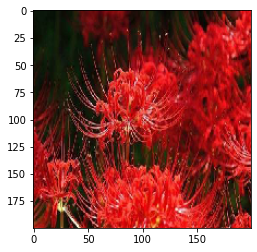

In [17]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/hoabingan_6.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Hoa này là:", label[a])

1/1 [==============================] - 0s 63ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 45ms/step
Hoa này là: anhdao


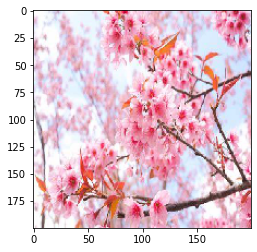

In [18]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/hoa anh dao.jfif',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Hoa này là:", label[a])